# Classification

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import numpy as np

# Generate synthetic cell data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, 
                          n_redundant=0, n_clusters_per_class=1,
                          random_state=42
)


# Data

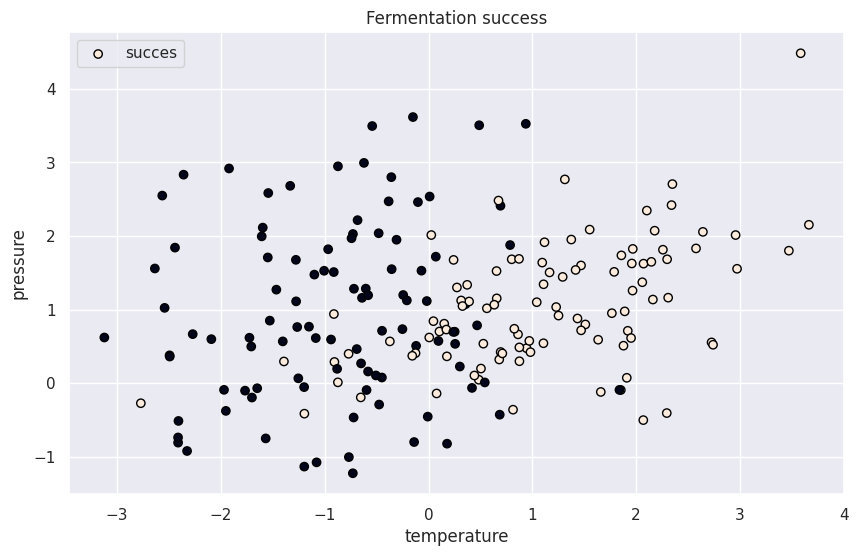

In [7]:
# plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black')
plt.xlabel("temperature")
plt.ylabel("pressure")
plt.title("Fermentation success")
plt.legend(["succes"]);


# Model

In [8]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

# Decisions 

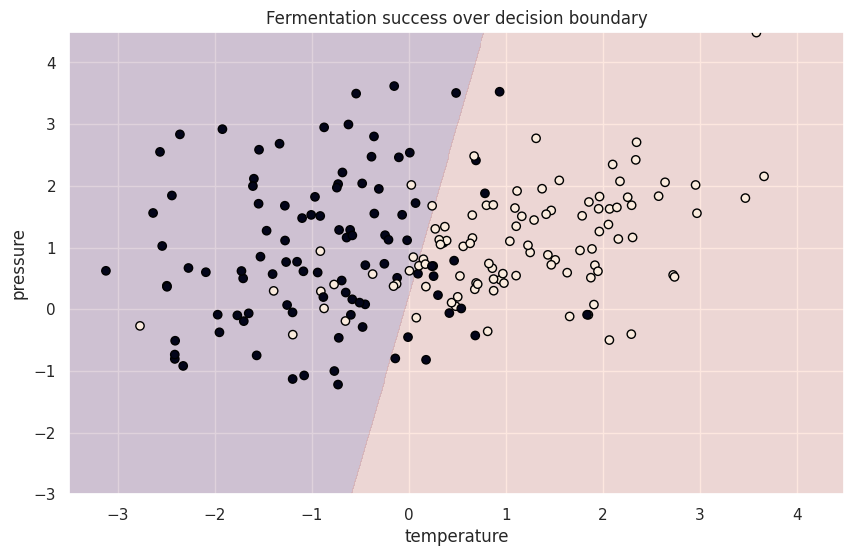

In [9]:
# Visualize decision boundary
plt.figure(figsize=(10, 6))

xx, yy = np.mgrid[-3.5:4.5:.01, -3:4.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, probs > 0.5, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.title("Fermentation success over decision boundary")
plt.show()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
probs = clf.predict_proba(X_test)

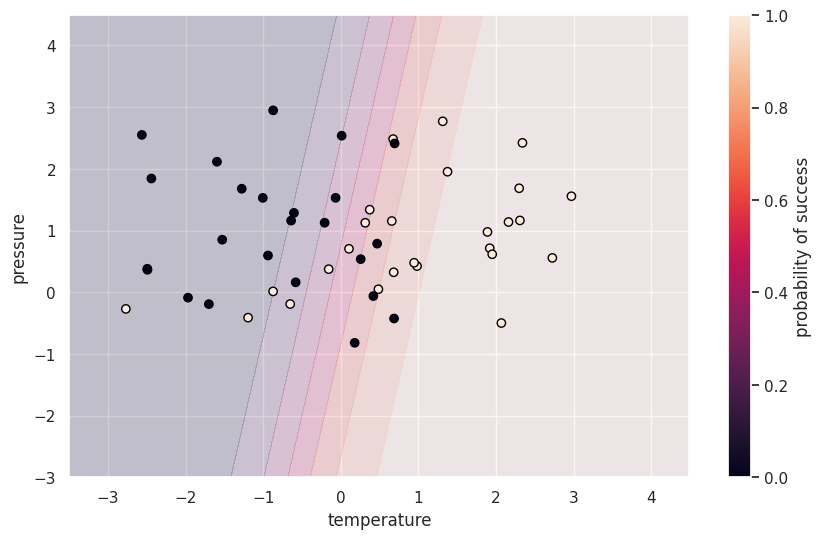

In [12]:
# visualize the probas in a heatmap
plt.figure(figsize=(10, 6))
grid = np.c_[xx.ravel(), yy.ravel()]

probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='black')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.colorbar(label='probability of success')

# Metrics

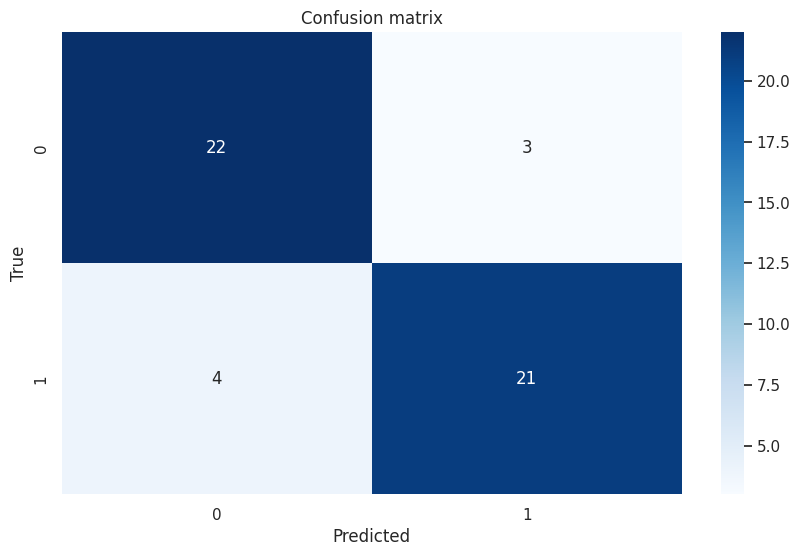

In [71]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [72]:
# metrics

from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 score: {f1_score(y_test, y_pred):.2f}")


Precision: 0.88
Recall: 0.84
F1 score: 0.86


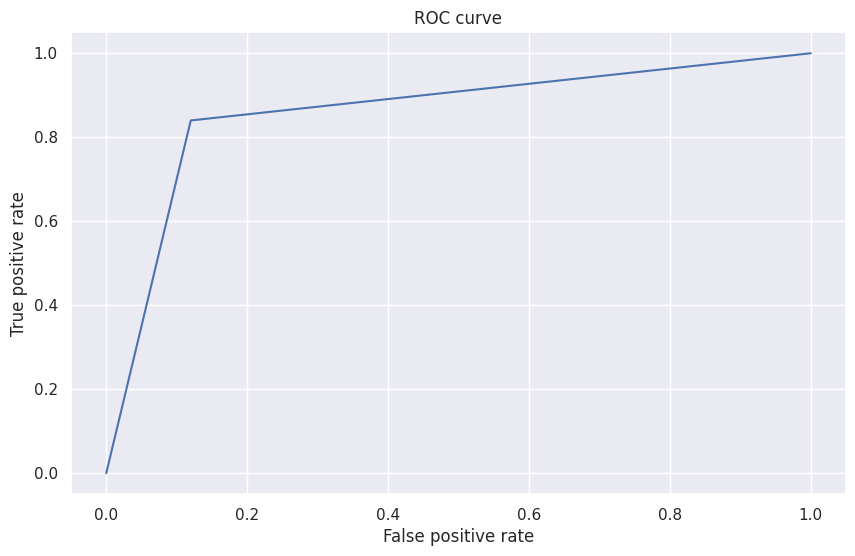

In [74]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
